### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [14]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from statsmodels import stats
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
lista_alumnos = [
    ("Juan Maniglia", 32, 1.75),
    ("Laura Fernandez", 46, 1.70),
    ("Miguel Rubio", 48, 1.75),
    ("Hugo Rubio", 18, 1.80),
    ("Carmen Campo", 72, 1.55),
    ("Alberto Fernandez", 40, 1.85),
    ("Mario Segura", 20, 1.75),
    ("Nuria Rubio", 19, 1.60),
    ("Marta Romero", 19, 1.65),
    ("Daniela Crespo", 20, 1.55),
]

In [6]:
df = pd.DataFrame(lista_alumnos, columns= ['Nombre', 'Edad', 'Altura'])
df

,Nombre,Edad,Altura
0,Juan Maniglia,32,1.75
1,Laura Fernandez,46,1.70
2,Miguel Rubio,48,1.75
3,Hugo Rubio,18,1.80
4,Carmen Campo,72,1.55
5,Alberto Fernandez,40,1.85
6,Mario Segura,20,1.75
7,Nuria Rubio,19,1.60
8,Marta Romero,19,1.65
9,Daniela Crespo,20,1.55


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  10 non-null     object 
 1   Edad    10 non-null     int64  
 2   Altura  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [8]:
df.describe()

,Edad,Altura
count,10.000000,10.00000
mean,33.400000,1.69500
std,18.007406,0.10395
min,18.000000,1.55000
25%,19.250000,1.61250
50%,26.000000,1.72500
75%,44.500000,1.75000
max,72.000000,1.85000


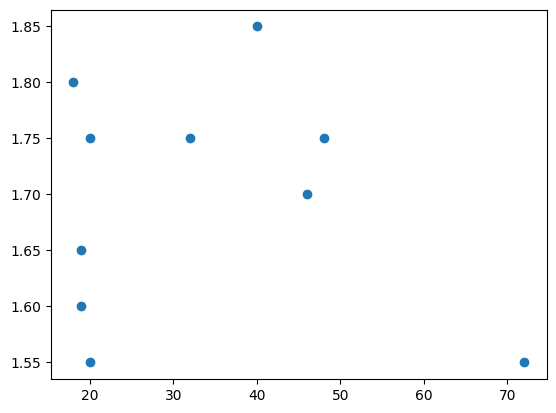

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'],df['Altura'])

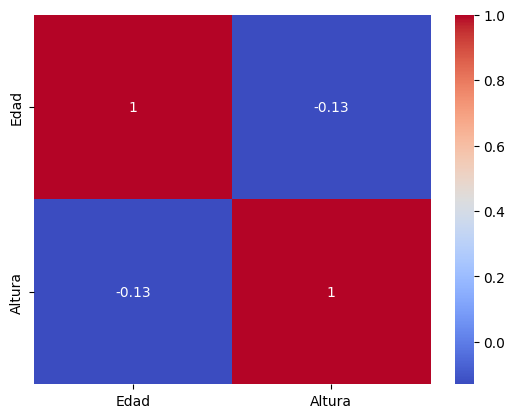

In [12]:
import seaborn as sns
# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = df[["Edad", "Altura"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

C:\Users\nuria\AppData\Local\Temp\ipykernel_20760\1025652608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Altura']);


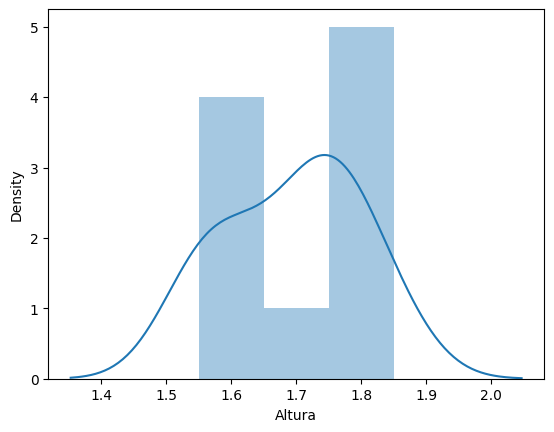

In [13]:
sns.distplot(df['Altura']);

In [15]:
df.head(3)

,Nombre,Edad,Altura
0,Juan Maniglia,32,1.75
1,Laura Fernandez,46,1.70
2,Miguel Rubio,48,1.75


In [50]:
# División de los datos en train y test
# ==============================================================================
X = df[['Edad']]
y = df['Altura']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.6, # 60%
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [63]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (10, 1)
Train features shape: (6, 1)
Train target shape: (6,)
Test features shape: (4, 1)
Test target shape: (4,)


In [64]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [65]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y)) #que tan bueno es el modelo con todos los datos

Intercept: 1.823894420004631
Coeficiente: [('Edad', np.float64(-0.002952072238944199))]
Coeficiente de determinación R^2: -0.22354786990543518


(Altura) = 1.85 - 0.0041*(Edad)

In [54]:
# Prediccion
modelo.predict(X_test)

array([1.76780505, 1.68219495, 1.76485298, 1.6880991 ])

In [55]:
df_test = pd.DataFrame(X_test)
df_test

,Edad
7,19
2,48
9,20
1,46


In [56]:
df_test = pd.DataFrame(X_test)
df_test['predict_height'] = modelo.predict(X_test)
df_test

,Edad,predict_height
7,19,1.767805
2,48,1.682195
9,20,1.764853
1,46,1.688099


In [57]:
df_test['real_height'] = y_test
df_test

,Edad,predict_height,real_height
7,19,1.767805,1.60
2,48,1.682195,1.75
9,20,1.764853,1.55
1,46,1.688099,1.70


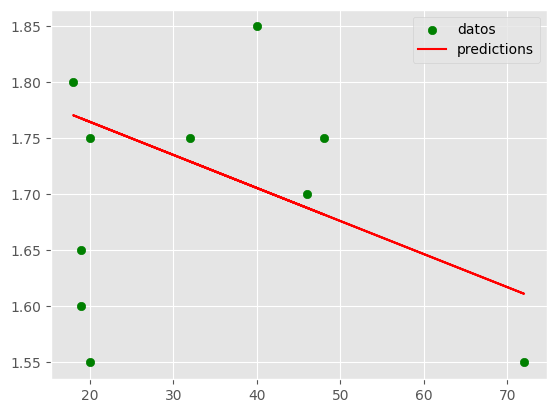

In [58]:
plt.scatter(df['Edad'], df['Altura'], color='g', label="datos");
plt.plot(df['Edad'], modelo.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [66]:
modelo.score(X,y)

-0.22354786990543518

In [67]:
df_test

,Edad,predict_height,real_height
7,19,1.767805,1.60
2,48,1.682195,1.75
9,20,1.764853,1.55
1,46,1.688099,1.70


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [68]:
print('MAE:', mean_absolute_error())
print('MSE:', mean_squared_error())
print('RMSE:', np.sqrt(mean_squared_error()))

TypeError: missing a required argument: 'y_true'

In [69]:
print('MAPE:', mean_absolute_percentage_error())

TypeError: missing a required argument: 'y_true'

In [70]:
modelo.predict([[85]])

array([1.57296828])

In [71]:
df_test

,Edad,predict_height,real_height
7,19,1.767805,1.60
2,48,1.682195,1.75
9,20,1.764853,1.55
1,46,1.688099,1.70


In [78]:
df_test['error'] = df_test['predict_height'] - df_test['real_height']
df_test

,Edad,predict_height,real_height,error
7,19,1.767805,1.60,0.167805
2,48,1.682195,1.75,-0.067805
9,20,1.764853,1.55,0.214853
1,46,1.688099,1.70,-0.011901


In [79]:
df_test['error'].mean()

np.float64(0.07573801805973629)

In [80]:
df_test['error_cuadratico'] =  df_test['error'] ** 2
df_test

,Edad,predict_height,real_height,error,error_cuadratico
7,19,1.767805,1.60,0.167805,0.028159
2,48,1.682195,1.75,-0.067805,0.004598
9,20,1.764853,1.55,0.214853,0.046162
1,46,1.688099,1.70,-0.011901,0.000142


In [81]:
df_test['error_cuadratico'].mean()

np.float64(0.019764872717893206)

In [82]:
np.sqrt(df_test['error_cuadratico'].mean())

np.float64(0.14058759802305895)

In [83]:
df_test['error'].mean()/df_test['real_height'].mean()

np.float64(0.0459018291271129)